## 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

SDSS M125935.70+275733.3, ra=194.89877,dec=27.95926  
elliptical  红移z=0.0239

In [2]:
file = 'spec-2240-53823-0585.fits'
hdu = fits.open(file)
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3824 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

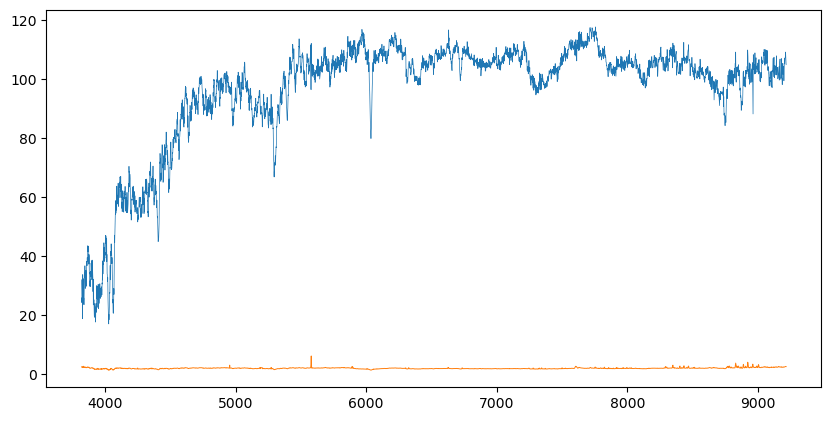

In [52]:
flux = hdu[1].data['flux']  
lam = 10**hdu[1].data['loglam']
err = 1/np.sqrt(hdu[1].data['ivar'])
plt.figure(figsize=(10,5),dpi=100)
plt.plot(lam,flux,linewidth=0.5)
plt.plot(lam,err,linewidth=0.7)
plt.show()

取NaD线

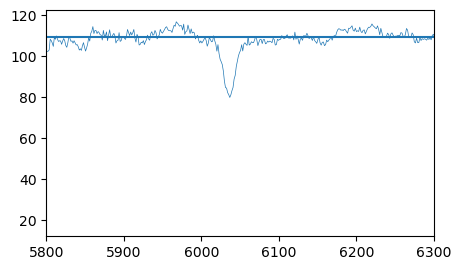

In [53]:
plt.figure(figsize=(5,3),dpi=100)
plt.xlim(5800,6300)
plt.plot(lam,flux,linewidth=0.5)
plt.axhline(cont)
#plt.plot(lam,err,linewidth=0.7)
plt.show()

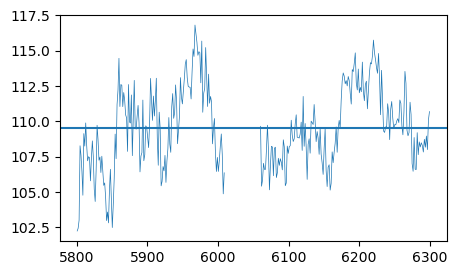

In [62]:
cut = np.where((lam>5800)&(lam<6300))
cut_flux = flux[cut]
cut_lam = lam[cut]
cut_err = err[cut]
mask = np.zeros(len(cut_flux))
mask[np.where((cut_lam>6010)&(cut_lam<6060))]=1

cut_ma_flux=np.ma.array(cut_flux,mask=mask)
cut_ma_lam=np.ma.array(cut_lam,mask=mask)
cut_ma_err=np.ma.array(cut_err,mask=mask)
cont = np.mean(cut_ma_flux)

plt.figure(figsize=(5,3),dpi=100)
plt.plot(cut_ma_lam,cut_ma_flux,linewidth=0.5)
plt.axhline(cont)
plt.show()

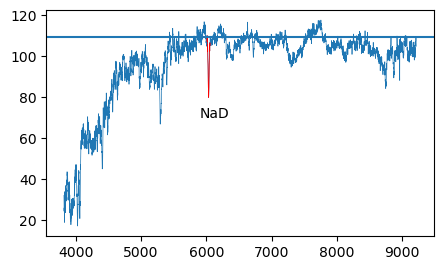

In [59]:
plt.figure(figsize=(5,3),dpi=100)
plt.plot(lam,flux,linewidth=0.5)
plt.plot(Na_lam,Na_flux,linewidth=0.5,c='r')
plt.axhline(cont)
plt.text(5900,70,s='NaD')
#plt.plot(lam,err,linewidth=0.7)
plt.show()

In [68]:
# NaD线的面积
Na_flux = cut_flux[np.where((cut_lam>6010)&(cut_lam<6060))]
Na_lam = cut_lam[np.where((cut_lam>6010)&(cut_lam<6060))]
print(len(Na_lam))
dlam = []
#dflx = []

for i in range(len(Na_lam)-1):
    dl = abs(Na_lam[i+1]-Na_lam[i])
    #df = abs(Na_flux[i+1]-Na_flux[i])
    dlam.append(dl)
    #dflx.append(df)
area1 = np.sum(np.array(dlam)*np.array(Na_flux[0:-1])) #谱线下的面积
area2 = np.sum(cont*np.array(dlam))-area1  #吸收坑里的面积
print(area1,area2)

EW = area2/cont
print("NaD:",EW)

36
4725.744 602.1074
NaD: 5.496112642192305


### 吸收线等值宽度为负值

In [69]:
# 误差传递
Na_err = err[np.where((cut_lam>6010)&(cut_lam<6060))]
err1 = np.sqrt(np.sum(Na_err**2))
print(err1)  # 求面积时的误差

err2 = np.sqrt(np.sum((cut_ma_err/cut_ma_flux)**2))
print(err2)  # 求cont的误差

err3 = np.sqrt(err1**2+err2**2)
print("error:",err3)  # 最后EW的误差

10.98911
0.33349448
error: 10.994169227775947


## 2.

$H\alpha=6562.8A$
光谱分辨率$R=\lambda/d\lambda$,$d\lambda=6562.8/2000=3.2814$  
假设：连续谱单位波长信噪比$s/n=\frac{25}{\sqrt{25}}=5$  
$H\alpha$的信号为$(EW(H\alpha)/d\lambda)\times25=50*25/3.2814=380.935$  
$H\alpha$的信噪比为$s/n=380.935/\sqrt{380.935}=19.52$

In [ ]:
### good~